# 清理与清洗数据项目

# 收集数据

In [1]:
#加载
import json 
import requests
import tweepy
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#载入WeRateDogs 的推特档案转换为数组twitter_archive
df1=pd.read_csv('twitter-archive-enhanced.csv')
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
folder_name='twitter_dog_reviews'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
#用requests库下载推特图像的预测数据
dog_review_url= 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response=requests.get(dog_review_url)

In [5]:
with open (os.path.join(folder_name,
                                 dog_review_url.split('/',) [-1]), mode='wb') as file:
           file.write(response.content)

In [6]:
#加载下载好的推特图像预测数据，转换为df2
df2=pd.read_csv('image-predictions.tsv', sep='\t')
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
#加载推特额外数据,提取转发数(retweet_count)和喜欢数(favorite_count)
tweet_list=[]
with open ('tweet_json.txt', 'r') as f:
    for row in f:
        json_dict = json.loads(row)
        to_append = {
              'tweet_id': json_dict['id'],
              'retweet_count': json_dict['retweet_count'],
              'favorite_count': json_dict['favorite_count']
        }
        tweet_list.append(to_append)
df_json=pd.DataFrame(tweet_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
#检测
df_json.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [9]:
#备份原始数据集，在备份数据集里对数据作出修改
df1_copy=df1.copy()
df2_copy=df2.copy()
df_json_copy=df_json.copy()

# 评估数据

## *推特档案、预测推特狗狗图像、推特附加数据集*

*先看看数据是否存在缺失值*

In [10]:
df1_copy.isnull().any()

tweet_id                      False
in_reply_to_status_id          True
in_reply_to_user_id            True
timestamp                     False
source                        False
text                          False
retweeted_status_id            True
retweeted_status_user_id       True
retweeted_status_timestamp     True
expanded_urls                  True
rating_numerator              False
rating_denominator            False
name                          False
doggo                         False
floofer                       False
pupper                        False
puppo                         False
dtype: bool

In [11]:
df2_copy.isnull().any()

tweet_id    False
jpg_url     False
img_num     False
p1          False
p1_conf     False
p1_dog      False
p2          False
p2_conf     False
p2_dog      False
p3          False
p3_conf     False
p3_dog      False
dtype: bool

In [12]:
df_json.isnull().any()

tweet_id          False
retweet_count     False
favorite_count    False
dtype: bool

从这里可以看出，所有df1_copy的缺失值是来因为这些列的数值缺失： 

in_reply_to_status_id，in_reply_to_user_id， retweeted_status_id，retweeted_status_user_id， retweeted_status_timestamp, expanded_urls。

通过观察数据可以知道，这些列都存在质量问题，在接下来清理质量问题时，这些列的问题会被处理，所以在这里不作处理了。

*再来看看是否有重复值。*

In [13]:
sum(df1_copy.duplicated())

0

In [14]:
sum(df2_copy.duplicated())

0

In [15]:
sum(df_json_copy.duplicated())

0

*查看数据的所有元素。*

In [16]:
list(df1_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [17]:
list(df2_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [18]:
list(df_json)

['tweet_id', 'retweet_count', 'favorite_count']

 *查了数据的分布情况*

In [19]:
df1_copy.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
df2_copy.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_json.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


*每个数据抽样20个*

In [22]:
df1_copy.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
480,815736392542261248,NaN,NaN,2017-01-02 01:48:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/815736392...,11,10,Akumi,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
1236,712438159032893441,NaN,NaN,2016-03-23 00:37:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kane. He's a semi-submerged Haitian Hu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712438159...,11,10,Kane,None,None,None,None
1986,672884426393653248,NaN,NaN,2015-12-04 21:05:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Marvelous dog here. Rad ears. Not very soft. L...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672884426...,6,10,None,None,None,None,None
2193,668902994700836864,NaN,NaN,2015-11-23 21:24:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lambeau. He's a Whistling Haiku from the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668902994...,11,10,Lambeau,None,None,None,None
909,757725642876129280,NaN,NaN,2016-07-25 23:54:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Beckham. He fell asleep at the wheel. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/757725642...,11,10,Beckham,None,None,None,None
1538,689835978131935233,NaN,NaN,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689835978...,11,10,Fynn,None,None,None,None
1292,708109389455101952,NaN,NaN,2016-03-11 01:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Remington. He was caught off guard by ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708109389...,10,10,Remington,None,None,None,None
544,805932879469572096,NaN,NaN,2016-12-06 00:32:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Major. He put on a tie for his first r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805932879...,12,10,Major,None,None,None,None
1174,720059472081784833,NaN,NaN,2016-04-13 01:22:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charleson. He lost his plunger. Looked...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/720059472...,9,10,Charleson,None,None,None,None


In [23]:
df2_copy.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
490,675531475945709568,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1,Pembroke,0.918441,True,Cardigan,0.027339,True,Siberian_husky,0.020221,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1087,718939241951195136,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,Pembroke,0.766327,True,Cardigan,0.222126,True,toilet_tissue,0.006757,False
412,673919437611909120,https://pbs.twimg.com/media/CVo-JuMWwAAet6F.jpg,1,jack-o'-lantern,0.172079,False,schipperke,0.115984,True,miniature_pinscher,0.052175,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
917,701570477911896070,https://pbs.twimg.com/media/Cbx6nz1WIAA0QSW.jpg,1,Yorkshire_terrier,0.907990,True,silky_terrier,0.076883,True,Australian_terrier,0.008473,True
334,672169685991993344,https://pbs.twimg.com/media/CVQGv-vUwAEUjCj.jpg,1,cocker_spaniel,0.991011,True,Sussex_spaniel,0.004032,True,miniature_poodle,0.001276,True
550,677547928504967168,https://pbs.twimg.com/media/CWciPonWEAUOqLD.jpg,1,American_Staffordshire_terrier,0.914978,True,Staffordshire_bullterrier,0.084395,True,boxer,0.000462,True
523,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,Boston_bull,0.976577,True,French_bulldog,0.014324,True,Chihuahua,0.002302,True
170,668992363537309700,https://pbs.twimg.com/media/CUi9ARGWUAEyWqo.jpg,1,lynx,0.287506,False,tabby,0.206048,False,koala,0.081419,False


In [24]:
df_json.sample(20)

,tweet_id,retweet_count,favorite_count
1058,741099773336379392,6218,10947
1814,676593408224403456,2400,4939
926,754449512966619136,840,4132
459,817502432452313088,3902,0
2025,671855973984772097,501,973
661,790723298204217344,2686,0
1098,735274964362878976,4679,9579
2269,667470559035432960,102,272
1423,697630435728322560,610,1901
149,862831371563274240,5421,19946


In [25]:
# 设置列宽
pd.set_option('max_colwidth',200)

*查看转发信息*

In [26]:
df1_copy[df1_copy.text.str.find('RT @') >= 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,http...",13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Lilly. She just parallel barked. Kindly requests a reward now. 13/10 would pet so well https://t.co/SATN4If5H5,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,"https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,https://twitter.com/dog_rates/status/830583320585068544/photo/1,http...",13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://…,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,"https://twitter.com/dog_rates/status/878057613040115712/photo/1,https://twitter.com/dog_rates/status/878057613040115712/photo/1",14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Meet Shadow. In an attempt to reach maximum zooming borkdrive, he tore his ACL. Still 13/10 tho. Help him out below\n\nhttps:/…",8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitter.com/dog_rates/status/878281511006478336/photo/1",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Terrance. He's being yelled at because he stapled the wrong stuff together. 11/10 hang in there Terrance https://t.co/i…,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397445533696/photo/1,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @rachel2195: @dog_rates the boyfriend and his soaking wet pupper h*cking love his new hat 14/10 https://t.co/dJx4Gzc50G,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,"https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,https://twitter.com/rachel2195/status/876850772322988033/photo/1,h...",14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Coco. At first I thought she was a cloud but clouds don't bork with such passion. 12/10 would hug softly https

*查看text中转发信息的个数与retweeted_status_id转发编号的数量有没有差异*

In [27]:
len(df1_copy[df1_copy.text.str.find('RT @') >= 0]) == len(df1_copy[df1_copy.retweeted_status_id.notnull()])

True

*查看分子小于10的数据信息*

In [28]:
df1_copy[df1_copy['rating_numerator']<10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111729840128/photo/1,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I was going to do 007/10, but the joke wasn't worth the &lt;10 rating",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313023332352/photo/1,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409219559425/photo/1,9,10,Beau,None,None,None,None
599,798682547630837760,NaN,NaN,2016-11-16 00:22:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,https://twitter.com/dog_rates/status/676936541936185344/photo/1,8,10,None,None,None,pupper,None
605,798576900688019456,NaN,NaN,2016-11-15 17:22:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133288665088/photo/1,1,10,None,None,None,None,None
730,781661882474196992,NaN,NaN,2016-09-30 01:08:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5,10,None,None,None,None,None


*查看分子小于10的text信息*

In [29]:
df1_copy[df1_copy['rating_numerator']<10].text

45                                This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
229     This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1
315                                                      When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag
387                                                                                                  I was going to do 007/10, but the joke wasn't worth the &lt;10 rating
462                           RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…
485                       RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/

*查看分母不等于10的数据信息*

In [30]:
df1_copy[df1_copy['rating_denominator']!=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitte

In [31]:
#查看分母不等于10的text信息
df1_copy[df1_copy['rating_denominator']!=10].text

313                                                                            @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
342                                                                                                                                      @docmisterio account started on 11/15/15
433                                                                           The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784                                  RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
902                                                                                                Why does th

查看rating_numerator 列中数据的有效性

In [32]:
df1_copy['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

*查看rating_denominator 列中数据的有效性*

In [33]:
df1_copy['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

*查看name 列的有效性*

In [34]:
df1_copy.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Toby              7
Bailey            7
Daisy             7
an                7
Buddy             7
Oscar             6
Scout             6
Stanley           6
Bella             6
Jax               6
Milo              6
Dave              6
Jack              6
Rusty             6
Leo               6
Koda              6
Oakley            5
               ... 
Georgie           1
Pumpkin           1
Ace               1
Mojo              1
Travis            1
Tino              1
Bobb              1
Alf               1
Chuck             1
Chuq              1
Tuco              1
Baron             1
Lolo              1
Jameson           1
Frönq             1
Lipton            1
Jed               1
Pawnd             1
unacceptable      1


*查看twitter_id列重复值*

In [35]:
df2_copy[df2_copy.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


*查看jpg_url列重复值*

In [36]:
df2_copy[df2_copy.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


## **通过评估数据，发现了以下问题：**

## 质量

- 转发数据大量缺失
- 无图片的推特需删除
- timestamp类型错误
- 狗狗地位列大量数据缺失
- jpg_url列重复值较多
- 狗狗名字列也有很多缺失
- 相关已失效转发列需删除
- 狗狗评分分子分母提取错误

## 整洁度

- doggo，floofer，pupper，puppo 列单独四列可合并为一列。
- 推特档案、推特图像预测数据、推特额外附加数据三个数据集可合并在一起。
- source, expanded urls列的数据用不上，可删除

# 数据清洗

### `df1_copy, df2_copy, df_json`: 推特档案、推特图像预测数据、推特额外附加数据三个数据集可合并在一起

### ***定义***

先合并前两个数据集，命名df_merge1, 再将df_merge1和df_json合并。

### *代码*

In [37]:
df_merge1=pd.merge(df1_copy, df2_copy, on='tweet_id', how='inner')
df_merge1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### `df_tweet`: 无图片的twitter需删除。

定义： 有图片才有图片预测数据，对推特图片预测数据集合并时选择 inner方式，就删掉了没有图片的推文条目。

### *代码*

In [38]:
df_tweet=pd.merge(df_merge1, df_json, on ='tweet_id', how='inner')

### *测试*

In [39]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016


### `df_tweet`: 转发数据大量缺失

### *定义*

筛出转发数据，将除此之外的数据重新赋值给df1，删除失效转发列。

In [40]:
df_tweet= df_tweet[df_tweet.text.str.find('RT @') == -1]

### *测试*

不包含转发信息的数据概览

In [41]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
jpg_url                       1994 non

因为缺失数据太多，直接删除in_reply_to_status_id, in_reply_to_user_id列

### *代码*

In [42]:
df_tweet= df_tweet.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

### *测试*

In [43]:
df_tweet

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548,66596
8,8906091851503124

### `df_tweet:` 相关已失效转发列需删除

### *定义*

相关转发数据已失效，删除retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp列

### *代码*

In [44]:
df_tweet= df_tweet.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

### *测试*

In [45]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null obj

### `df_tweet`: **无用列source** 

###                         **无用列expanded_urls**

### *定义*

删除source、expanded_urls这两列用不上的数据

### *代码*

In [46]:
df_tweet= df_tweet.drop(['expanded_urls','source'],axis=1)

### *测试*

In [47]:
df_tweet

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8842,39492
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6480,33786
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4301,25445
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8925,42863
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,None,None,None,None,None,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3240,20548
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,None,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2142,12053
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,None,None,None,None,None,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,19548,66596
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,None,None,None,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,None,None,None,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7684,32467


### `df_tweet`: doggo，floofer，pupper，puppo 列单独四列可合并为一列

### *定义*

筛选出需要合并的列和 id 列单独成为一个数据集来melt, 删除 variable 之后，第一次 drop_duplicates 清理掉大部分的重复数据, 将所有 stage 为 None 的数据删除, 用 loc 方法筛选出 tweet_id 仍然存在重复的项，修改其 stage 为 multiple, 再一次删除重复项，最后与原数据进行 left 合并。

### *代码*

In [48]:
df_stage = df_tweet[['tweet_id','doggo','floofer','pupper','puppo']].copy()
df_stage = pd.melt(df_stage,id_vars=['tweet_id'],value_name='stage')

In [49]:
df_stage.drop('variable',axis=1,inplace=True)
df_stage.drop_duplicates(inplace=True)

In [50]:
df_stage = df_stage[df_stage['stage']!='None']

In [51]:
df_stage.loc[df_stage['tweet_id'].duplicated(keep=False), 'stage']='multiple'

In [52]:
df_stage.drop_duplicates(inplace=True)
df_tweet= df_tweet.merge(df_stage,how='left',on='tweet_id')

In [53]:
df_tweet['stage']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28      pupper
29         NaN
         ...  
1964       NaN
1965       NaN
1966       NaN
1967       NaN
1968       NaN
1969       NaN
1970       NaN
1971       NaN
1972       NaN
1973       NaN
1974       NaN
1975       NaN
1976       NaN
1977       NaN
1978       NaN
1979       NaN
1980       NaN
1981       NaN
1982       NaN
1983       NaN
1984       NaN
1985       NaN
1986       NaN
1987       NaN
1988       NaN
1989       NaN
1990       NaN
1991       NaN
1992       NaN
1993       NaN
Name: stage, Length: 1994, dtype: object

In [54]:
df_tweet=df_tweet.drop_duplicates("tweet_id")

### *测试*

In [55]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bo

### `df_tweet`: 狗狗名字列也有很多缺失。

### *定义*

根据名字前会出现的单词、字段在text中用正则表达式提取名字，看看非空值有多少。

In [56]:
df_tweet['name'] = df_tweet.text.str.extract(r'(?:This is|Meet|Say hello to|Here is|named|name is|name to|Here we have)\s([A-Z][^\s.,]*)',expand=True)
df_tweet[df_tweet.name.notnull()].name.count()

1382

### *测试*

In [57]:
df_tweet['name'].value_counts()

Charlie       11
Oliver        10
Lucy          10
Cooper        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Bella          6
Koda           6
Bo             6
Stanley        6
Jax            6
Oscar          5
Chester        5
Louis          5
Leo            5
Scout          5
Bailey         5
Zoey           5
Rusty          5
Milo           5
Buddy          5
Dave           5
Phil           4
Chip           4
Jack           4
              ..
Kyro           1
Sailer         1
Jarod          1
Brooks         1
Arnold         1
Timber         1
Mojo           1
Clarkus        1
Julio          1
Sojourner      1
Gin            1
Cupid          1
Carter         1
Nida           1
Sprout         1
Rizzo          1
Andy           1
Benny          1
Gilbert        1
Ace            1
Mingus         1
Kara           1
Jordy          1
Mya            1
Smiley         1
Sabertooth     1
Georgie        1
Pipsy         

### `df_tweet`: 狗狗评分分子分母提取错误

### *定义*

重新从text中提取狗狗评分分子分母，新命名text_numerators，text_denominators列，查看rating_numerator<10, rating_denominator!=10的数据，将text中提取出来的评分分子text_numerators和rating_numerator列不一样的修改，用正则表达式提取评分分子小于10和分子大于20的评分分数，命名df_tweet2，查看评分分子不是整数的行，和再df_tweet2中用正则表达式提取出来是NaN的数据，将这些行text中评分分子和rating_numerator列不一样的在df_tweet中修改。

### *代码*

In [58]:
df_tweet[['text_numerators' , 'text_denominators']]=df_tweet.text.str.extract('((?:\d{1,2}\..)?\d{1,2})/(\d{1,2}).', expand=True)

### *测试*

In [59]:
df_tweet

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,text_numerators,text_denominators
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,None,None,None,None,...,0.085851,False,banana,0.076110,False,8842,39492,NaN,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,None,None,None,None,...,0.090647,True,papillon,0.068957,True,6480,33786,NaN,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,None,None,None,None,...,0.078253,True,kelpie,0.031379,True,4301,25445,NaN,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,None,None,None,None,...,0.168086,True,spatula,0.040836,False,8925,42863,NaN,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,None,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016,NaN,12,10
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13,10,NaN,None,None,None,None,...,0.116317,True,Indian_elephant,0.076902,False,3240,20548,NaN,13,10
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13,10,Jax,None,None,None,None,...,0.199287,True,ice_lolly,0.193548,False,2142,12053,NaN,13,10
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13,10,NaN,None,None,None,None,...,0.178406,True,Pembroke,0.076507,True,19548,66596,NaN,13,10
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13,10,Zoey,None,None,None,None,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187,NaN,13,10
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14,10,Cassie,doggo,None,None,None,...,0.451038,True,Chihuahua,0.029248,True,7684,32467,doggo,14,10


筛出text_numerators列和rating_numerator列不一样的数值

In [60]:
df_tweet[df_tweet['text_numerators']!=df_tweet['rating_numerator'].astype(str)][['text','rating_numerator','rating_denominator','text_numerators', 'text_denominators']]

,text,rating_numerator,rating_denominator,text_numerators,text_denominators
50,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,12,10,50. 12,10
503,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,9.75,10
553,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,11.27,10
662,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,65,15
726,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,76,10
848,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,04,17
1302,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130,43,13
1303,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,21,11
1374,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,11.26,10
1435,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120,44,12


参考text中的评分分数，对需要修改的进行修改

In [61]:
list =  ['509', '560', '670', '859', '1313', '1314', '1385', '1446', '1729', '1773']
for index in list:
    df_tweet['rating_denominator']='10'
assert True

In [62]:
df_tweet.loc[509, 'rating_numerator']='9.75'
df_tweet.loc[560, 'rating_numerator']='11.27'
df_tweet.loc[670, 'rating_numerator']='11'
df_tweet.loc[859, 'rating_numerator']='12'
df_tweet.loc[1313, 'rating_numerator']='11'
df_tweet.loc[1314, 'rating_numerator']='11'
df_tweet.loc[1385, 'rating_numerator']='11.26'
df_tweet.loc[1446, 'rating_numerator']='12'

### *测试*

In [63]:
df_tweet[df_tweet['text_numerators']!=df_tweet['rating_numerator'].astype(str)][['text','rating_numerator','rating_denominator','text_numerators', 'text_denominators']]

,text,rating_numerator,rating_denominator,text_numerators,text_denominators
50,Meet Elliot. He's a Canadian Forrest Pup. Unusual number of antlers for a dog. Sneaky tongue slip to celebrate #Canada150. 12/10 would pet https://t.co/cgwJwowTMC,12,10,50. 12,10
503,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,9.75,10
509,Meet Rusty. He appears to be rather h*ckin fluffy. Also downright adorable af. 12/10 would rub my face against his https://t.co/1j9kLGb4wV,9.75,10,12,10
553,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,11.27,10
560,Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,11.27,10,13,10
662,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,10,65,15
670,She walks herself up and down the train to be petted by all the passengers. 13/10 I can't handle this https://t.co/gwKCspY8N2,11,10,13,10
726,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,76,10
848,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,10,04,17
859,"This is Puff. He started out on the streets (first pic), but don't let the new smile fool you, still tough af. 11/10 https://t.co/kiuXRXcg4B",12,10,11,10


In [64]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null object
rating_denominator    1994 non-null object
name                  1382 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null 

筛出分母不等于10的数据

In [65]:
df_tweet[['rating_numerator', 'rating_denominator']]=df_tweet[['rating_numerator', 'rating_denominator']].astype(float)

### *代码*

In [66]:
df_tweet[df_tweet['rating_denominator']!=10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,text_numerators,text_denominators


### *代码*

经过修改后的rating_numerator和rating_denominator变成了object类型重新修改为数字型

In [67]:
df_tweet[['rating_numerator', 'rating_denominator']]=df_tweet[['rating_numerator', 'rating_denominator']].astype(float)

再次查看和提炼分子评分小于10和评分大于20的数据

### *代码*

In [68]:
df_tweet[df_tweet['rating_numerator']<10]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,text_numerators,text_denominators
39,883482846933004288,2017-07-08 00:28:19 +0000,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.00,10.0,Bella,None,None,None,None,...,0.032409,True,kuvasz,0.005501,True,10336,46741,NaN,5,10
177,848212111729840128,2017-04-01 16:35:01 +0000,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6.00,10.0,Jerry,None,None,None,None,...,0.245797,True,wallaby,0.131647,False,3421,17545,NaN,6,10
235,835152434251116546,2017-02-24 15:40:31 +0000,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.00,10.0,NaN,None,None,None,None,...,0.012731,True,Staffordshire_bullterrier,0.007039,True,3425,24478,NaN,0,10
509,785872687017132033,2016-10-11 16:00:24 +0000,Meet Rusty. He appears to be rather h*ckin fluffy. Also downright adorable af. 12/10 would rub my face against his https://t.co/1j9kLGb4wV,9.75,10.0,Rusty,None,None,None,None,...,0.198358,True,Pekinese,0.143328,True,2112,7452,NaN,12,10
530,781661882474196992,2016-09-30 01:08:10 +0000,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5.00,10.0,NaN,None,None,None,None,...,0.226954,True,collie,0.070652,True,3107,11586,NaN,5,10
554,777885040357281792,2016-09-19 15:00:20 +0000,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.00,10.0,Wesley,None,None,None,None,...,0.119682,True,Siberian_husky,0.108709,True,1882,7054,NaN,3,10
593,771014301343748096,2016-08-31 15:58:28 +0000,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7.00,10.0,NaN,None,None,None,None,...,0.111790,False,macaque,0.088925,False,1768,6998,NaN,7,10
608,768193404517830656,2016-08-23 21:09:14 +0000,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.00,10.0,Gerald,doggo,None,None,None,...,0.300851,False,cheetah,0.094474,False,4053,12104,doggo,8,10
616,766423258543644672,2016-08-18 23:55:18 +0000,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,9.00,10.0,Shadoe,None,None,None,None,...,0.003897,True,Norwegian_elkhound,0.000253,True,1810,6651,NaN,9,10
628,763183847194451968,2016-08-10 01:23:03 +0000,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8.00,10.0,Clark,None,None,None,None,...,0.338642,True,teddy,0.155828,False,1690,5981,NaN,8,10


In [69]:
df_tweet[df_tweet['rating_numerator']>20]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,text_numerators,text_denominators
323,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,10.0,NaN,None,None,None,None,...,0.059526,True,Samoyed,0.037400,True,3699,13476,NaN,84,70
385,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,10.0,Sam,None,None,None,None,...,0.036708,True,Labrador_retriever,0.025823,True,1647,5904,NaN,24,7
503,786709082849828864,2016-10-13 23:23:56 +0000,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10.0,Logan,None,None,None,None,...,0.122978,False,chow,0.102654,True,7033,20221,NaN,9.75,10
553,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10.0,Sophie,None,None,pupper,None,...,0.015950,True,Lhasa,0.006519,True,1867,7292,pupper,11.27,10
662,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,10.0,NaN,None,None,None,None,...,0.113956,True,American_Staffordshire_terrier,0.099689,True,2516,5297,NaN,65,15
726,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10.0,Atticus,None,None,None,None,...,0.080822,False,sunglass,0.050776,False,2769,5594,NaN,76,10
848,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,10.0,NaN,None,None,None,None,...,0.051351,False,king_penguin,0.049444,False,1427,4172,NaN,04,17
925,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,10.0,Bluebert,None,None,None,None,...,0.317053,True,Eskimo_dog,0.273419,True,246,2562,NaN,50,50
946,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,10.0,NaN,None,None,None,None,...,0.177413,True,Irish_setter,0.092725,True,827,3049,NaN,99,90
970,710658690886586372,2016-03-18 02:46:49 +0000,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,10.0,NaN,None,None,None,None,...,0.018664,True,cairn,0.015943,True,633,2513,NaN,80,80


在分母为10的基础上，对text中的分子和rating_numerator不一致的进行修改。

In [70]:
df_tweet.loc[325, 'rating_numerator']=12
df_tweet.loc[902, 'rating_numerator']=13
df_tweet.loc[936, 'rating_numerator']=11
df_tweet.loc[957, 'rating_numerator']=11
df_tweet.loc[981, 'rating_numerator']=10
df_tweet.loc[999, 'rating_numerator']=9
df_tweet.loc[1141, 'rating_numerator']=11
df_tweet.loc[1505, 'rating_numerator']=11

In [71]:
list =  ['325', '936', '957', '981', '999', '1141', '1505']
for index in list:
    df_tweet['rating_denominator']='10'
assert True

提取出的分子是带有小数点的，分母是10的倍数

In [72]:
df_tweet['rating_numerator']['rating_denominator'] = df_tweet.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)', expand = True)
df_tweet

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,stage,text_numerators,text_denominators
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None,...,0.085851,False,banana,0.076110,False,8842,39492,NaN,13,10
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,None,None,None,...,0.090647,True,papillon,0.068957,True,6480,33786,NaN,13,10
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,None,None,None,...,0.078253,True,kelpie,0.031379,True,4301,25445,NaN,12,10
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,None,None,None,None,...,0.168086,True,spatula,0.040836,False,8925,42863,NaN,13,10
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None,None,None,None,...,0.225770,True,German_short-haired_pointer,0.175219,True,9721,41016,NaN,12,10
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,NaN,None,None,None,None,...,0.116317,True,Indian_elephant,0.076902,False,3240,20548,NaN,13,10
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,Jax,None,None,None,None,...,0.199287,True,ice_lolly,0.193548,False,2142,12053,NaN,13,10
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,NaN,None,None,None,None,...,0.178406,True,Pembroke,0.076507,True,19548,66596,NaN,13,10
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,None,None,None,None,...,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4403,28187,NaN,13,10
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,doggo,None,None,None,...,0.451038,True,Chihuahua,0.029248,True,7684,32467,doggo,14,10


再用 findall 找出所有 text 中有多个分数的数据

In [73]:
df_tweet['rating'] = df_tweet.text.str.findall('((?:\d+\.)?\d+\/[1-9]+[0]+)')
for index in df_tweet.index:
  rating = df_tweet.loc[index,'rating']
  if len(set(rating))>1: # 如果有大于一个不同的匹配值
      print(index)
      print(df_tweet.loc[index,'text'])

555
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ
749
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ
891
Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
925
This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
941
Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/10
get it together Flurp https://t.co/Akzl5ynMmE
1062
This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that. 9/10 and 2/10 https://t.co/8rc5I22bBf
1152
This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P
1157
Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark for shit. 10/10 &amp; 

In [74]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null object
name                  1382 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

修改数据类型

In [75]:
df_tweet[['rating_denominator', 'rating_numerator']].astype(float)

,rating_denominator,rating_numerator
0,10.0,13.0
1,10.0,13.0
2,10.0,12.0
3,10.0,13.0
4,10.0,12.0
5,10.0,13.0
6,10.0,13.0
7,10.0,13.0
8,10.0,13.0
9,10.0,14.0


### *测试*

In [76]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null object
name                  1382 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null

### `df_tweet`: 狗狗地位列大量数据缺失

### *定义*

重新从text中提取狗狗地位。

### *代码*

In [77]:
df_tweet['type']=df_tweet.text.str.lower().str.findall('(doggo|pupper|puppo|floof)')

In [78]:
df_tweet['type'] = df_tweet['type'].apply(lambda x: ','.join(set(x)))

In [79]:
df_tweet['type'].replace('', np.nan, inplace = True)

### *测试*

In [80]:
df_tweet['type']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9        doggo
10         NaN
11         NaN
12       puppo
13         NaN
14       puppo
15         NaN
16         NaN
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24       floof
25         NaN
26         NaN
27         NaN
28      pupper
29         NaN
         ...  
1964       NaN
1965       NaN
1966       NaN
1967       NaN
1968       NaN
1969       NaN
1970       NaN
1971       NaN
1972       NaN
1973       NaN
1974       NaN
1975       NaN
1976       NaN
1977       NaN
1978       NaN
1979       NaN
1980       NaN
1981       NaN
1982       NaN
1983       NaN
1984       NaN
1985       NaN
1986       NaN
1987       NaN
1988       NaN
1989       NaN
1990       NaN
1991       NaN
1992       NaN
1993       NaN
Name: type, Length: 1994, dtype: object

In [81]:
df_tweet[df_tweet['type']!=df_tweet['stage'].astype(str)][['type','stage','text']]

,type,stage,text
0,NaN,NaN,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,NaN,NaN,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,NaN,NaN,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,NaN,NaN,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,NaN,NaN,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,NaN,NaN,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6,NaN,NaN,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,NaN,NaN,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
8,NaN,NaN,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
10,NaN,NaN,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme


### `df_tweet`: timestamp类型错误

### *定义*

修改timestamp数据类型

### *代码*

In [82]:
df_tweet.timestamp = pd.to_datetime(df_tweet.timestamp.str.split('+',expand=True)[0])
df_tweet.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

### *测试*

In [83]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null object
name                  1382 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 

### `df_tweet`: jpg_url列重复值较多

### *定义*

由于前面已经清理了多余数据，现在只需查看是否还有重复值，如果没有，就不用清理jpg_url列了。

### *代码*

In [84]:
df_tweet['jpg_url'].duplicated().any()

False

### *测试*

In [85]:
df_tweet['jpg_url']

0                                               https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1                                               https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2                                               https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
3                                               https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
4                                               https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
5                                               https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg
6                                               https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg
7                                               https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg
8                                               https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg
9                                               https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
10                                      

保存文件到本地

In [86]:
df_tweet.to_csv('Desktop/twitter_archive_master.csv')

# 分析和可视化

In [87]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null object
name                  1382 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 

筛出点赞数、转发量、评分分子这几列，新数据集命名favorite_retweet_rating, 将评分分子改名为评分。

再将数据集按评分排列

In [88]:
df_tweet[['rating_numerator','rating_denominator']] = df_tweet[['rating_numerator','rating_denominator']].astype(float).astype(int)

In [89]:
favorite_retweet_rating=df_tweet[['favorite_count', 'retweet_count', 'rating_numerator']]
favorite_retweet_rating = favorite_retweet_rating.rename(columns = {'rating_numerator':'rating'})
favorite_retweet_rating = favorite_retweet_rating.sort_values(by='rating', ascending=False)[10:]
favorite_retweet_rating

,favorite_count,retweet_count,rating
970,2513,633,80
503,20221,7033,75
1054,3193,1023,60
925,2562,246,50
988,2623,716,45
1130,3730,1547,44
553,7292,1867,27
1374,1868,542,26
385,5904,1647,24
571,24093,6425,14


画散点图

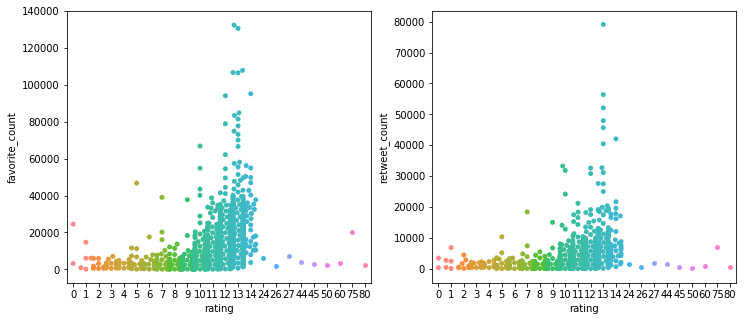

In [90]:
ig, axes = plt.subplots(1,2,figsize=(12, 5)) 
sns.swarmplot(x="rating", y="favorite_count",  data=favorite_retweet_rating, ax=axes[0])
sns.swarmplot(x="rating", y="retweet_count", data=favorite_retweet_rating, ax=axes[1])

从散点图可以看出，每个评分区间都有一定的转发量点赞数和转发量最多的数量都集中在10到14分之间，点赞数高于转发量。

画直方图

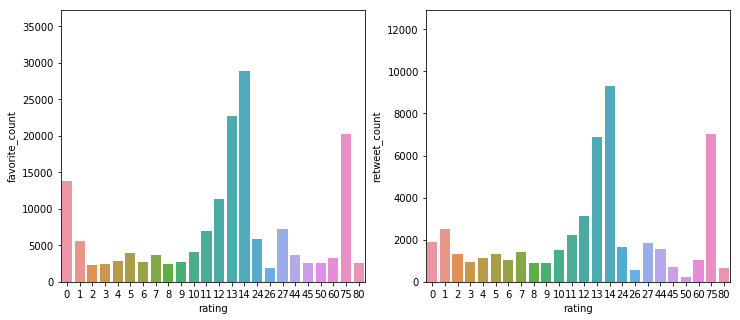

In [91]:
fig, axes = plt.subplots(1,2,figsize=(12, 5)) 
sns.barplot(x="rating", y="favorite_count", data=favorite_retweet_rating, dodge=False, errwidth=0, ax=axes[0])
sns.barplot(x="rating", y="retweet_count", data=favorite_retweet_rating, dodge=False, errwidth=0, ax=axes[1])

从直方图来看，纵坐标区间较第一个散点图小，它的数量也集中于10-14，除了60-76之间也很高。

看两个变量之间呈什么相关

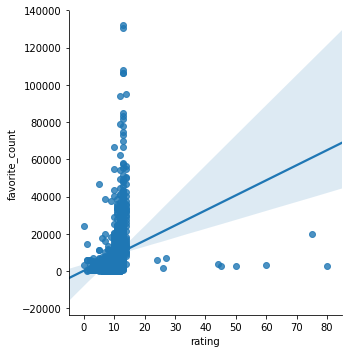

In [92]:
sns.lmplot('rating','favorite_count',data=favorite_retweet_rating)

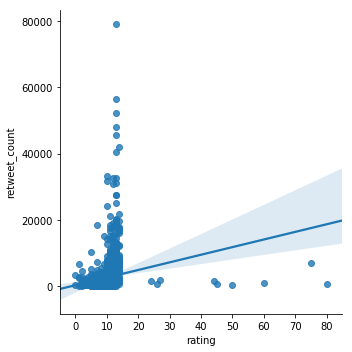

In [93]:
sns.lmplot('rating','retweet_count',data=favorite_retweet_rating)

两个图都呈正相关关系，其中，点赞数和评分正相关关联更明显。

再看各个变量的集中区域。

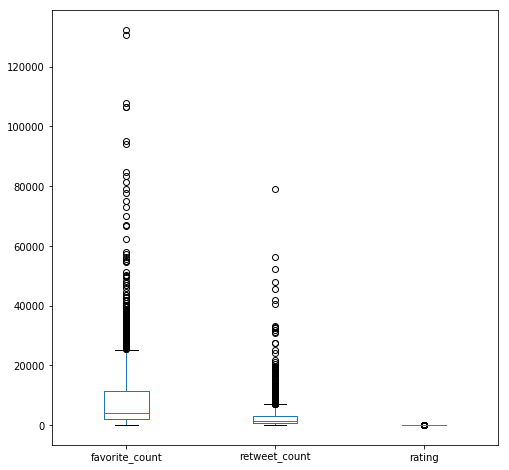

In [94]:
favorite_retweet_rating.plot(kind='box', figsize=(8,8));

点赞数和转发量各自的集中范围分别在25000-50000，8000-22000之间，由于纵坐标区间太大，评分集中区域不明显。

# 总结

**在用编程方式从网上提取数据后，可能存在提取不准确的情况，需要对数据进行清洗；而清洗的时候主要看哪些因素对数据的影响最大，应该先清理，不重要的或影响较小的应该放在后面清理，数据用不到的行或列可以删除；在清洗的时候主要看数据在整洁度和质量方面有什么问题，在这个数据中，整洁度问题包括存在无用列source等，doggo，floofer，pupper，puppo列单独四列可合并为一列，推特档案、推特图像预测数据、推特额外附加数据三个数据集科可合并在一起，质量问题包括很多转发数据缺失，转发信息失去有效性，狗狗地位列大量数据缺失、有效性较少，狗狗名字、评分分子分母列也有严重缺失，timestamp类型错误，jpg_url列重复值较多等。**
    
**而在可视化狗狗受欢迎程度和评分之间的关系可以知道的是，评分在10-14之间的狗狗最受人们欢迎, 点赞数总量大于转发数总量，这可能是因为WeRateDog twitter的评分有一些不客观，人们无法对有些狗狗的真实评分作出判断，而WeRateDog的评分又被广泛关注，它很容易就影响了喜欢看它推文的人。**